**Remark: old data methods removed, will no longer work.**

# CURRENT Imports v01
May be changed below.

In [1]:
# Jupyter, Python imports
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np

#  python 3interactive figures in a live IPython notebook session
%matplotlib nbagg

# studentproject18ws imports
import os
import logging
from studenproject18ws.hdf.reader import Reader
from studenproject18ws.hdf.recipes import Recipes

In [2]:
# more imports if necessary


# CURRENT File selection & read v01 - hard-coded

In [3]:
# filename = 'banddos_4x4.hdf'
# filename = 'banddos.hdf'
filename = 'banddos_Co.hdf'

filepath = ['..', 'data', 'input', filename]
filepath = os.path.join(*filepath)

data = None
extractor = Reader(filepath=filepath)
with extractor as h5file:
    data = extractor.read(recipe=Recipes.Bands)
    #
    # Note:
    # Inside the with statement (context manager),
    # all data attributes that are type h5py Dataset are available (in-file access)
    # When the statement is left,the HDF5 file gets closed and the datasets are closed.
    #
    # Use data outside the with-statement (in-memory access: all HDF5 datasets converted to numpy ndarrays):
    data.move_datasets_to_memory()
    


In [4]:
# data (currently) has a function that returns a plt configured to .show() bandstrure plt.
# we want to reuse that code here now. So do a little magic: retrieve the function definiton

def retrieve_function_def(function):
    """Returns the function definition of a func in memory and pastes into new notebook cell.
    """
    import inspect
    get_ipython().set_next_input("".join(inspect.getsourcelines(function)[0]))

retrieve_function_def(data.new_plotfunction_weights)

In [ ]:
    def new_plotfunction_weights(self, bands, characters, groups, spin):
        """

        :param bands:
        :param characters:
        :param groups:
        :param spin:
        :return:
        """

        weight_k_n = self.combined_weight(characters, groups, spin)

        fig = plt.figure()
        ax1 = fig.add_subplot(111)

        for n in bands:
            weight_k_n[n]
            ax1.scatter(self.k_distances, self.E_i(n, spin), marker='o', c='b', s=2 * weight_k_n[n], lw=0)

        plt.xticks(self.k_special_points, self.k_special_point_labels)

        """
        for i in range(len(special_points)):
            index = special_points[i]
            plt.vlines(k_dist[index-1], -0.2, 0.4)
        """
        plt.xlim(0, max(self.k_distances))
        return plt


In [5]:
    def new_plotfunction_weights(self, bands, characters, groups, spin):
        """

        :param bands:
        :param characters:
        :param groups:
        :param spin:
        :return:
        """

        weight_k_n = self.combined_weight(characters, groups, spin)

        fig = plt.figure()
        ax1 = fig.add_subplot(111)

        for n in bands:
            weight_k_n[n]
            ax1.scatter(self.k_distances, self.E_i(n, spin), marker='o', c='b', s=2 * weight_k_n[n], lw=0)

        plt.xticks(self.k_special_points, self.k_special_point_labels)

        """
        for i in range(len(special_points)):
            index = special_points[i]
            plt.vlines(k_dist[index-1], -0.2, 0.4)
        """
        plt.xlim(0, max(self.k_distances))
        return plt


In [6]:
    def new_plotfunction_weights(self, bands, characters, groups, spin):
        """

        :param bands:
        :param characters:
        :param groups:
        :param spin:
        :return:
        """

        weight_k_n = self.combined_weight(characters, groups, spin)

        fig = plt.figure()
        ax1 = fig.add_subplot(111)

        for n in bands:
            weight_k_n[n]
            ax1.scatter(self.k_distances, self.E_i(n, spin), marker='o', c='b', s=2 * weight_k_n[n], lw=0)

        plt.xticks(self.k_special_points, self.k_special_point_labels)

        """
        for i in range(len(special_points)):
            index = special_points[i]
            plt.vlines(k_dist[index-1], -0.2, 0.4)
        """
        plt.xlim(0, max(self.k_distances))
        return plt


# FROZEN Plot v01
This version is fixed and commented out.

uses Import v01, File read v01.

In [7]:
# # okay, copied the relevant code from data.new_plotfunction_weights:
# # defining the plt outside of the function so we can link it with widgets.

# fig, ax = plt.subplots(1, figsize=(10,6))
# plt.suptitle(f"BandStructure of {filename}")

# # define widgets function


# # bands = atom_group_keys = e.g. for banddos.hdf: dict_keys[(1,2,3,4,5)]
# #                           Hm... should better convert to tuple back in reader?
# def_groups = data.atom_group_keys
# select_groups = widgets.SelectMultiple(options=def_groups, 
#                                    value=tuple(def_groups),
#                                   description='Atom Groups',
#                                   disabled=False)


# def_characters = ['s', 'p', 'd', 'f']
# # Characters = namedtuple('Characters', ['s', 'p', 'd', 'f'])
# # characters = Characters(0,1,2,3)
# select_characters = widgets.SelectMultiple(options=def_characters,
#                                           value=tuple(def_characters),
#                                           description='Band Character',
#                                           disabled=False)

# # number of bands can be large, so use a rangeslider instead of selectionslider
# def_bands = [band for band in range(data.eigenvalues.shape[2])]
# select_bands = widgets.IntRangeSlider(value=[def_bands[0]+1,def_bands[-1]+1], 
#                                       min=def_bands[0]+1, max=def_bands[-1]+1, step=1,
#                                      description='Bands',
#                                      disabled=False, continuous_update=False,
#                                      orientation='horizontal', readout=True,
#                                      readout_format='d')

# # the banddos y scale changes on change in band selection.
# # can disable that by storing ymin, ymax at startup (all bands selected).
# #   - Apparently this does not work by setting inside the update_plot for-loop with an if-condition
# #     to find ymin and ymax defined outside the function. No idea why. Perhaps try again, did sth wrong.
# # Okay, for now try another solution: here outside the plot, do the for-loop separately and define
# # ymin, ymax this way.
# ymin, ymax = (0,0)
# for n in def_bands:
#     y = data.E_i(n, spin=0)
#     ymin = min(ymin, np.min(y))
#     ymax = max(ymax, np.max(y))

# # okay, now need a checkbox to turn on/off y rescaling for the update_plot()
# select_rescale_ylim = widgets.Checkbox(value=False,
#                                    description='Rescale y-axis',
#                                    disabled=False)

# @interact(bands=select_bands, characters=select_characters, groups=select_groups, fix_ylim=select_rescale_ylim)
# def update_plot(bands, characters, groups, fix_ylim):
    
#     ax.clear()
    
#     # convert arguments to the expected format
#     bands_conved = range(bands[0]-1,bands[1]-1)
#     groups_conved = [el-1 for el in groups]
#     characters_conved = [def_characters.index(el) for el in characters]
    
#     # TODO: define spin also as parameter
#     spin = 0
#     weight_k_n = data.combined_weight(characters=characters_conved, groups=groups_conved, spin=spin)
    
#     for n in bands_conved:
#         weight_k_n[n]
        
#         x = data.k_distances
#         y = data.E_i(n, spin)
        
#         # store 
#         ax.scatter(x=x, y=y, marker='o', c='b', s=2 * weight_k_n[n], lw=0)
    
#     plt.xticks(data.k_special_points, data.k_special_point_labels)
    
#     plt.xlim(0, max(data.k_distances))
#     if not fix_ylim:
#         plt.ylim(ymin=ymin,ymax=ymax)
#     plt.show()
    



# CURRENT Plot v02 - add spin
uses Import v01, File read v01.


<IPython.core.display.Javascript object>


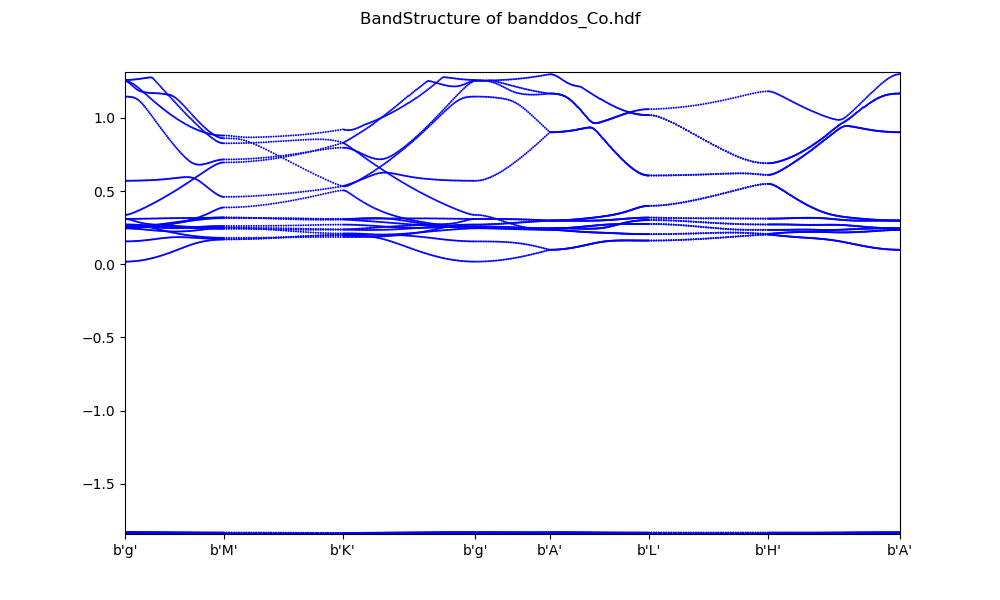

interactive(children=(IntRangeSlider(value=(1, 24), continuous_update=False, description='Bands', max=24, min=…

In [8]:
# okay, copied the relevant code from data.new_plotfunction_weights:
# defining the plt outside of the function so we can link it with widgets.

fig, ax = plt.subplots(1, figsize=(10,6))
plt.suptitle(f"BandStructure of {filename}")

# define widgets function


# bands = atom_group_keys = e.g. for banddos.hdf: dict_keys[(1,2,3,4,5)]
#                           Hm... should better convert to tuple back in reader?
def_groups = data.atom_group_keys
select_groups = widgets.SelectMultiple(options=def_groups, 
                                   value=tuple(def_groups),
                                  description='Atom Groups',
                                  disabled=False)


def_characters = ['s', 'p', 'd', 'f']
# Characters = namedtuple('Characters', ['s', 'p', 'd', 'f'])
# characters = Characters(0,1,2,3)
select_characters = widgets.SelectMultiple(options=def_characters,
                                          value=tuple(def_characters),
                                          description='Band Character',
                                          disabled=False)

# number of bands can be large, so use a rangeslider instead of selectionslider
def_bands = [band for band in range(data.eigenvalues.shape[2])]
select_bands = widgets.IntRangeSlider(value=[def_bands[0]+1,def_bands[-1]+1], 
                                      min=def_bands[0]+1, max=def_bands[-1]+1, step=1,
                                     description='Bands',
                                     disabled=False, continuous_update=False,
                                     orientation='horizontal', readout=True,
                                     readout_format='d')

# the banddos y scale changes on change in band selection.
# can disable that by storing ymin, ymax at startup (all bands selected).
#   - Apparently this does not work by setting inside the update_plot for-loop with an if-condition
#     to find ymin and ymax defined outside the function. No idea why. Perhaps try again, did sth wrong.
# Okay, for now try another solution: here outside the plot, do the for-loop separately and define
# ymin, ymax this way.
ymin, ymax = (0,0)
for n in def_bands:
    y = data.E_i(n, spin=0)
    ymin = min(ymin, np.min(y))
    ymax = max(ymax, np.max(y))

# okay, now need a checkbox to turn on/off y rescaling for the update_plot()
select_rescale_ylim = widgets.Checkbox(value=False,
                                   description='Rescale y-axis',
                                   disabled=False)

@interact(bands=select_bands, characters=select_characters, groups=select_groups, fix_ylim=select_rescale_ylim)
def update_plot(bands, characters, groups, fix_ylim):
    
    ax.clear()
    
    # convert arguments to the expected format
    bands_conved = range(bands[0]-1,bands[1]-1)
    groups_conved = [el-1 for el in groups]
    characters_conved = [def_characters.index(el) for el in characters]
    
    # TODO: define spin also as parameter
    spin = 0
    weight_k_n = data.combined_weight(characters=characters_conved, groups=groups_conved, spin=spin)
    
    for n in bands_conved:
        weight_k_n[n]
        
        x = data.k_distances
        y = data.E_i(n, spin)
        
        # store 
        ax.scatter(x=x, y=y, marker='o', c='b', s=2 * weight_k_n[n], lw=0)
    
    plt.xticks(data.k_special_points, data.k_special_point_labels)
    
    plt.xlim(0, max(data.k_distances))
    if not fix_ylim:
        plt.ylim(ymin=ymin,ymax=ymax)
    plt.show()